In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [130]:
df_date = pd.read_csv('G:\\Data Analysis\\final project\\csv\\DimDate.csv')
df_date.head()

,DateKey,GregorianDate,GregorianYearInt,GregorianMonthNo,GregorianDayInMonth,GregorianMonthDayInt,GregorianDayOfWeekInt,GregorianMonthName,GregorianStr,GregorianYearMonthInt,...,HijriYearMonthStr,HijriDayOfWeekName,HijriWeekOfYearName,HijriWeekOfYearNo,SeasonCode,SeasonName,IsGregorianLeap,IsPersianLeap,IsOneDayBefore_PersianHoliday,IsOneDayBefore_HijriHoliday
0,19000101,Microsoft.OleDb.Date,1900,1,1,101,1,January,Microsoft.OleDb.Date,190001,...,1317/08,الإثنينِ,الأسبوع 35,35,4,زمستان,0,0,0,0
1,19000102,Microsoft.OleDb.Date,1900,1,2,102,2,January,Microsoft.OleDb.Date,190001,...,1317/09,الثلاثاء,الأسبوع 35,35,4,زمستان,0,0,0,0
2,19000103,Microsoft.OleDb.Date,1900,1,3,103,3,January,Microsoft.OleDb.Date,190001,...,1317/09,الأربعاء,الأسبوع 35,35,4,زمستان,0,0,0,0
3,19000104,Microsoft.OleDb.Date,1900,1,4,104,4,January,Microsoft.OleDb.Date,190001,...,1317/09,الخميس,الأسبوع 35,35,4,زمستان,0,0,1,1
4,19000105,Microsoft.OleDb.Date,1900,1,5,105,5,January,Microsoft.OleDb.Date,190001,...,1317/09,الجمعة,الأسبوع 35,35,4,زمستان,0,0,0,0


In [131]:
df_customer = pd.read_csv('G:\\Data Analysis\\final project\\csv\\merge_customer.csv')
df_customer.head()

,Customer ID,Customer Name,Segment,superstore.order
0,AA-10315,Alex Avila,Consumer,[Table]
1,AA-10375,Allen Armold,Consumer,[Table]
2,AA-10480,Andrew Allen,Consumer,[Table]
3,AA-10645,Anna Andreadi,Consumer,[Table]
4,AB-10015,Aaron Bergman,Consumer,[Table]


In [132]:
df_order = pd.read_csv('G:\\Data Analysis\\final project\\csv\\merge_order.csv')
df_order.head()

,Order ID,Customer ID,Order Priority,Order Date,Market,superstore.order_detail,superstore.returned,superstore.shipping,superstore customer
0,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,[Table],[Table],[Table],[Table]
1,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,[Table],[Table],[Table],[Table]
2,CA-2011-128055,AA-10315,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],[Table],[Table]
3,CA-2011-138100,AA-10315,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],[Table],[Table]
4,CA-2012-121391,AA-10315,Critical,2012-10-04T00:00:00.0000000,US,[Table],[Table],[Table],[Table]


In [133]:
df_customer_order = pd.merge(df_customer, df_order, on='Customer ID')
df_customer_order.head()

,Customer ID,Customer Name,Segment,superstore.order,Order ID,Order Priority,Order Date,Market,superstore.order_detail,superstore.returned,superstore.shipping,superstore customer
0,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],[Table],[Table]
1,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],[Table],[Table]
2,AA-10315,Alex Avila,Consumer,[Table],CA-2012-121391,Critical,2012-10-04T00:00:00.0000000,US,[Table],[Table],[Table],[Table]
3,AA-10315,Alex Avila,Consumer,[Table],BO-2014-9240,Medium,2014-06-05T00:00:00.0000000,EMEA,[Table],[Table],[Table],[Table]
4,AA-10315,Alex Avila,Consumer,[Table],CA-2013-103982,Medium,2013-03-04T00:00:00.0000000,US,[Table],[Table],[Table],[Table]


In [134]:
df_order_detail = pd.read_csv('G:\\Data Analysis\\final project\\csv\\order_detail.csv')
df_order_detail.head()

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,superstore.order,superstore.product
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033,[Value],[Value]
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449,[Value],[Value]
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627,[Value],[Value]
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371,[Value],[Value]
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787,[Value],[Value]


In [135]:
df_customer_order_detail = pd.merge(df_customer_order, df_order_detail, on='Order ID')
df_customer_order_detail.head()

,Customer ID,Customer Name,Segment,superstore.order_x,Order ID,Order Priority,Order Date,Market,superstore.order_detail,superstore.returned,...,superstore customer,Row ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,superstore.order_y,superstore.product
0,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,[Table],33526,OFF-BI-10004390,673.568,2,0.2,252.5880,54.96,[Value],[Value]
1,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,[Table],33527,OFF-AP-10002765,52.980,2,0.0,14.8344,3.17,[Value],[Value]
2,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,[Table],38765,OFF-PA-10000349,14.940,3,0.0,7.0218,0.99,[Value],[Value]
3,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,[Table],38766,FUR-FU-10002456,14.560,2,0.0,6.2608,1.31,[Value],[Value]
4,AA-10315,Alex Avila,Consumer,[Table],CA-2012-121391,Critical,2012-10-04T00:00:00.0000000,US,[Table],[Table],...,[Table],32596,OFF-ST-10001590,26.960,2,0.0,7.0096,5.23,[Value],[Value]


In [136]:
df_product = pd.read_csv('G:\\Data Analysis\\final project\\csv\\product.csv')
df_product.head()

,Product ID,Product Name,Category,Sub-Category,superstore.order_detail
0,FUR-ADV-10000002,"Advantus Photo Frame, Duo Pack",Furniture,Furnishings,[Table]
1,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings,[Table]
2,FUR-ADV-10000183,"Advantus Photo Frame, Black",Furniture,Furnishings,[Table]
3,FUR-ADV-10000188,"Advantus Stacking Tray, Erganomic",Furniture,Furnishings,[Table]
4,FUR-ADV-10000190,"Advantus Frame, Duo Pack",Furniture,Furnishings,[Table]


In [137]:
df_customer_order_detail_product = pd.merge(df_customer_order_detail, df_product, on='Product ID')
df_customer_order_detail_product.head()

,Customer ID,Customer Name,Segment,superstore.order_x,Order ID,Order Priority,Order Date,Market,superstore.order_detail_x,superstore.returned,...,Quantity,Discount,Profit,Shipping Cost,superstore.order_y,superstore.product,Product Name,Category,Sub-Category,superstore.order_detail_y
0,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,2,0.2,252.5880,54.96,[Value],[Value],GBC DocuBind 200 Manual Binding Machine,Office Supplies,Binders,[Table]
1,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,2,0.0,14.8344,3.17,[Value],[Value],Fellowes Advanced Computer Series Surge Protec...,Office Supplies,Appliances,[Table]
2,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,3,0.0,7.0218,0.99,[Value],[Value],Staples,Office Supplies,Paper,[Table]
3,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,2,0.0,6.2608,1.31,[Value],[Value],"Master Caster Door Stop, Large Neon Orange",Furniture,Furnishings,[Table]
4,AA-10315,Alex Avila,Consumer,[Table],CA-2012-121391,Critical,2012-10-04T00:00:00.0000000,US,[Table],[Table],...,2,0.0,7.0096,5.23,[Value],[Value],Tenex Personal Project File with Scoop Front D...,Office Supplies,Storage,[Table]


In [138]:
df_return = pd.read_csv('G:\\Data Analysis\\final project\\csv\\return.csv')
df_return.head()

,Order ID,superstore.order
0,CA-2011-100762,[Value]
1,CA-2011-100867,[Value]
2,CA-2011-102652,[Value]
3,CA-2011-103373,[Value]
4,CA-2011-103744,[Value]


In [139]:
df_shipping = pd.read_csv('G:\\Data Analysis\\final project\\csv\\shipping.csv')
df_shipping.head()

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,superstore.order
0,21043,CA-2012-124891,2012-07-31T00:00:00.0000000,Same Day,New York City,New York,United States,East,[Value]
1,21044,IN-2013-77878,2013-02-07T00:00:00.0000000,Second Class,Wollongong,New South Wales,Australia,Oceania,[Value]
2,21045,IN-2013-71249,2013-10-18T00:00:00.0000000,First Class,Brisbane,Queensland,Australia,Oceania,[Value]
3,21046,ES-2013-1579342,2013-01-30T00:00:00.0000000,First Class,Berlin,Berlin,Germany,Central,[Value]
4,21047,SG-2013-4320,2013-11-06T00:00:00.0000000,Same Day,Dakar,Dakar,Senegal,Africa,[Value]


In [140]:
df_customer_order_detail_product_shipping = pd.merge(df_customer_order_detail_product, df_shipping, on='Order ID')
df_customer_order_detail_product_shipping.head()

,Customer ID,Customer Name,Segment,superstore.order_x,Order ID,Order Priority,Order Date,Market,superstore.order_detail_x,superstore.returned,...,Sub-Category,superstore.order_detail_y,Shipping ID,Ship Date,Ship Mode,City,State,Country,Region,superstore.order
0,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,Binders,[Table],26108,2011-04-05T00:00:00.0000000,Standard Class,San Francisco,California,United States,West,[Value]
1,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,Appliances,[Table],26108,2011-04-05T00:00:00.0000000,Standard Class,San Francisco,California,United States,West,[Value]
2,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,Paper,[Table],44204,2011-09-20T00:00:00.0000000,Standard Class,New York City,New York,United States,East,[Value]
3,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,Furnishings,[Table],44204,2011-09-20T00:00:00.0000000,Standard Class,New York City,New York,United States,East,[Value]
4,AA-10315,Alex Avila,Consumer,[Table],CA-2012-121391,Critical,2012-10-04T00:00:00.0000000,US,[Table],[Table],...,Storage,[Table],39333,2012-10-07T00:00:00.0000000,First Class,San Francisco,California,United States,West,[Value]


In [141]:
print(df_date.shape)
print(df_customer.shape)
print(df_order.shape)
print(df_customer_order.shape)
print(df_order_detail.shape)
print(df_customer_order_detail.shape)
print(df_product.shape)
print(df_customer_order_detail_product.shape)
print(df_return.shape)
print(df_shipping.shape)
print(df_customer_order_detail_product_shipping.shape)

(47483, 47)
(795, 4)
(25033, 9)
(25004, 12)
(49670, 10)
(49608, 21)
(10246, 5)
(49608, 25)
(1172, 2)
(25033, 9)
(49608, 33)


In [142]:
df_final = df_customer_order_detail_product_shipping
df_final

,Customer ID,Customer Name,Segment,superstore.order_x,Order ID,Order Priority,Order Date,Market,superstore.order_detail_x,superstore.returned,...,Sub-Category,superstore.order_detail_y,Shipping ID,Ship Date,Ship Mode,City,State,Country,Region,superstore.order
0,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,Binders,[Table],26108,2011-04-05T00:00:00.0000000,Standard Class,San Francisco,California,United States,West,[Value]
1,AA-10315,Alex Avila,Consumer,[Table],CA-2011-128055,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],...,Appliances,[Table],26108,2011-04-05T00:00:00.0000000,Standard Class,San Francisco,California,United States,West,[Value]
2,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,Paper,[Table],44204,2011-09-20T00:00:00.0000000,Standard Class,New York City,New York,United States,East,[Value]
3,AA-10315,Alex Avila,Consumer,[Table],CA-2011-138100,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],...,Furnishings,[Table],44204,2011-09-20T00:00:00.0000000,Standard Class,New York City,New York,United States,East,[Value]
4,AA-10315,Alex Avila,Consumer,[Table],CA-2012-121391,Critical,2012-10-04T00:00:00.0000000,US,[Table],[Table],...,Storage,[Table],39333,2012-10-07T00:00:00.0000000,First Class,San Francisco,California,United States,West,[Value]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49603,ZD-21925,Zuschuss Donatelli,Consumer,[Table],SG-2014-5870,High,2014-06-03T00:00:00.0000000,Africa,[Table],[Table],...,Binders,[Table],27185,2014-06-05T00:00:00.0000000,Second Class,Dakar,Dakar,Senegal,Africa,[Value]
49604,ZD-21925,Zuschuss Donatelli,Consumer,[Table],SG-2014-5870,High,2014-06-03T00:00:00.0000000,Africa,[Table],[Table],...,Art,[Table],27185,2014-06-05T00:00:00.0000000,Second Class,Dakar,Dakar,Senegal,Africa,[Value]
49605,ZD-21925,Zuschuss Donatelli,Consumer,[Table],TU-2012-9540,High,2012-03-08T00:00:00.0000000,EMEA,[Table],[Table],...,Envelopes,[Table],43084,2012-03-09T00:00:00.0000000,First Class,Izmir,Izmir,Turkey,EMEA,[Value]
49606,ZD-21925,Zuschuss Donatelli,Consumer,[Table],UP-2013-6630,High,2013-11-07T00:00:00.0000000,EMEA,[Table],[Table],...,Labels,[Table],40997,2013-11-11T00:00:00.0000000,Standard Class,Kharkiv,Kharkiv,Ukraine,EMEA,[Value]


In [143]:
df_final.columns

Index(['Customer ID', 'Customer Name', 'Segment', 'superstore.order_x',
       'Order ID', 'Order Priority', 'Order Date', 'Market',
       'superstore.order_detail_x', 'superstore.returned',
       'superstore.shipping', 'superstore customer', 'Row ID', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'superstore.order_y', 'superstore.product', 'Product Name', 'Category',
       'Sub-Category', 'superstore.order_detail_y', 'Shipping ID', 'Ship Date',
       'Ship Mode', 'City', 'State', 'Country', 'Region', 'superstore.order'],
      dtype='object')

In [144]:
df_final = df_final.drop(columns=['superstore.order_x', 'superstore.order_detail_x', 'superstore.returned',
                                  'superstore.shipping', 'superstore customer', 'Row ID', 'Profit',
                                  'superstore.order_y', 'superstore.product', 'superstore.order_detail_y',
                                  'superstore.order',
                                  'Customer ID', 'Customer Name', 'Order ID', 'Product ID', 'Product Name', 'Shipping ID', 'Ship Date',
                                  'City', 'State', 'Country',
                                  'Sub-Category', 'Region'
                                  ])
df_final

,Segment,Order Priority,Order Date,Market,Sales,Quantity,Discount,Shipping Cost,Category,Ship Mode
0,Consumer,Medium,2011-03-31T00:00:00.0000000,US,673.568,2,0.2,54.96,Office Supplies,Standard Class
1,Consumer,Medium,2011-03-31T00:00:00.0000000,US,52.980,2,0.0,3.17,Office Supplies,Standard Class
2,Consumer,Medium,2011-09-15T00:00:00.0000000,US,14.940,3,0.0,0.99,Office Supplies,Standard Class
3,Consumer,Medium,2011-09-15T00:00:00.0000000,US,14.560,2,0.0,1.31,Furniture,Standard Class
4,Consumer,Critical,2012-10-04T00:00:00.0000000,US,26.960,2,0.0,5.23,Office Supplies,First Class
...,...,...,...,...,...,...,...,...,...,...
49603,Consumer,High,2014-06-03T00:00:00.0000000,Africa,33.480,4,0.0,3.49,Office Supplies,Second Class
49604,Consumer,High,2014-06-03T00:00:00.0000000,Africa,88.860,2,0.0,10.83,Office Supplies,Second Class
49605,Consumer,High,2012-03-08T00:00:00.0000000,EMEA,13.560,2,0.6,2.02,Office Supplies,First Class
49606,Consumer,High,2013-11-07T00:00:00.0000000,EMEA,45.360,4,0.0,3.62,Office Supplies,Standard Class


In [145]:
df_final.columns

Index(['Segment', 'Order Priority', 'Order Date', 'Market', 'Sales',
       'Quantity', 'Discount', 'Shipping Cost', 'Category', 'Ship Mode'],
      dtype='object')

In [146]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49608 entries, 0 to 49607
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment         49608 non-null  object 
 1   Order Priority  49608 non-null  object 
 2   Order Date      49608 non-null  object 
 3   Market          49608 non-null  object 
 4   Sales           49608 non-null  float64
 5   Quantity        49608 non-null  int64  
 6   Discount        49608 non-null  float64
 7   Shipping Cost   49608 non-null  float64
 8   Category        49608 non-null  object 
 9   Ship Mode       49608 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.8+ MB


In [147]:
df_final['Order Date'] = pd.to_datetime(df_final['Order Date'])

df_final['Order_Year'] = df_final['Order Date'].dt.year
df_final['Order_Month'] = df_final['Order Date'].dt.month
df_final['Order_DayOfWeek'] = df_final['Order Date'].dt.dayofweek
df_final['Order_Day'] = df_final['Order Date'].dt.day

df_final = df_final.drop(columns=['Order Date'])
df_final.head()

,Segment,Order Priority,Market,Sales,Quantity,Discount,Shipping Cost,Category,Ship Mode,Order_Year,Order_Month,Order_DayOfWeek,Order_Day
0,Consumer,Medium,US,673.568,2,0.2,54.96,Office Supplies,Standard Class,2011,3,3,31
1,Consumer,Medium,US,52.980,2,0.0,3.17,Office Supplies,Standard Class,2011,3,3,31
2,Consumer,Medium,US,14.940,3,0.0,0.99,Office Supplies,Standard Class,2011,9,3,15
3,Consumer,Medium,US,14.560,2,0.0,1.31,Furniture,Standard Class,2011,9,3,15
4,Consumer,Critical,US,26.960,2,0.0,5.23,Office Supplies,First Class,2012,10,3,4


In [148]:
print(f'Segment: {df_final['Segment'].unique()}\n')
print(f'Order Priority: {df_final['Order Priority'].unique()}\n')
print(f'Market: {df_final['Market'].unique()}\n')
print(f'Category: {df_final['Category'].unique()}\n')
# print(f'Sub-Category: {df_final['Sub-Category'].unique()}\n')
print(f'Ship Mode: {df_final['Ship Mode'].unique()}\n')
# print(f'Region: {df_final['Region'].unique()}\n')

# print(f'City: {df_final['City'].unique()}\n')
# print(f'State: {df_final['State'].unique()}\n')
# print(f'Country: {df_final['Country'].unique()}\n')

Segment: ['Consumer' 'Home Office' 'Corporate']

Order Priority: ['Medium' 'Critical' 'High' 'Low']

Market: ['US' 'EMEA' 'EU' 'Africa' 'APAC' 'LATAM' 'Canada']

Category: ['Office Supplies' 'Furniture' 'Technology']

Ship Mode: ['Standard Class' 'First Class' 'Second Class' 'Same Day']



In [149]:
onehot_cols = ['Segment', 'Market', 'Category']

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(df_final[onehot_cols])

onehot_df = pd.DataFrame(
    onehot_encoded,
    columns=onehot_encoder.get_feature_names_out(onehot_cols)
)

In [150]:
label_encoder_order = LabelEncoder()
df_final['Order Priority'] = label_encoder_order.fit_transform(df_final['Order Priority'])

# label_encoder_ship = LabelEncoder()
# df_final['Ship Mode'] = label_encoder_ship.fit_transform(df_final['Ship Mode'])

In [151]:
categories_order = [['Standard Class', 'First Class', 'Second Class', 'Same Day']]

oe = OrdinalEncoder(categories=categories_order)
df_final['Ship Mode'] = oe.fit_transform(df_final[['Ship Mode']])

In [152]:
df_encoded = pd.concat([df_final.drop(columns=onehot_cols), onehot_df], axis=1)
df_encoded

,Order Priority,Sales,Quantity,Discount,Shipping Cost,Ship Mode,Order_Year,Order_Month,Order_DayOfWeek,Order_Day,...,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology
0,3,673.568,2,0.2,54.96,0.0,2011,3,3,31,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3,52.980,2,0.0,3.17,0.0,2011,3,3,31,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,14.940,3,0.0,0.99,0.0,2011,9,3,15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,14.560,2,0.0,1.31,0.0,2011,9,3,15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,26.960,2,0.0,5.23,1.0,2012,10,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49603,1,33.480,4,0.0,3.49,2.0,2014,6,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49604,1,88.860,2,0.0,10.83,2.0,2014,6,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49605,1,13.560,2,0.6,2.02,1.0,2012,3,3,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
49606,1,45.360,4,0.0,3.62,0.0,2013,11,3,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [153]:
cols = ['Sales', 'Quantity', 'Discount', 'Shipping Cost']

max_len = max(len(col) for col in cols)

for col in cols:
    max_val = df_encoded[col].max()
    min_val = df_encoded[col].min()
    print(f'{col.ljust(max_len)} -> max: {str(max_val).ljust(20)} min: {str(min_val).ljust(20)}')

Sales         -> max: 22638.5              min: 0.444               
Quantity      -> max: 14                   min: 1                   
Discount      -> max: 0.85                 min: 0.0                 
Shipping Cost -> max: 933.57               min: 0.002               


In [ ]:
df_encoded['Is_Weekend'] = df_encoded['Order_DayOfWeek'].isin([5, 6]).astype(int)
df_encoded['Is_Start_Month'] = (df_encoded['Order_Day'] <= 7).astype(int)
df_encoded['Is_End_Month'] = (df_encoded['Order_Day'] >= 24).astype(int)
df_encoded['Discounted_Sales'] = df_encoded['Sales'] * (1 - df_encoded['Discount'])
df_encoded['Shipping_Ratio'] = df_encoded['Shipping Cost'] / df_encoded['Sales']
df_encoded['Sales_per_Quantity'] = df_encoded['Sales'] / df_encoded['Quantity']
df_encoded['ShipCost_per_Quantity'] = df_encoded['Shipping Cost'] / df_encoded['Quantity']

In [155]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49608 entries, 0 to 49607
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order Priority            49608 non-null  int64  
 1   Sales                     49608 non-null  float64
 2   Quantity                  49608 non-null  int64  
 3   Discount                  49608 non-null  float64
 4   Shipping Cost             49608 non-null  float64
 5   Ship Mode                 49608 non-null  float64
 6   Order_Year                49608 non-null  int32  
 7   Order_Month               49608 non-null  int32  
 8   Order_DayOfWeek           49608 non-null  int32  
 9   Order_Day                 49608 non-null  int32  
 10  Segment_Consumer          49608 non-null  float64
 11  Segment_Corporate         49608 non-null  float64
 12  Segment_Home Office       49608 non-null  float64
 13  Market_APAC               49608 non-null  float64
 14  Market

In [156]:
df_encoded.head()

,Order Priority,Sales,Quantity,Discount,Shipping Cost,Ship Mode,Order_Year,Order_Month,Order_DayOfWeek,Order_Day,...,Category_Furniture,Category_Office Supplies,Category_Technology,Is_Weekend,Is_Start_Month,Is_End_Month,Discounted_Sales,Shipping_Ratio,Sales_per_Quantity,ShipCost_per_Quantity
0,3,673.568,2,0.2,54.96,0.0,2011,3,3,31,...,0.0,1.0,0.0,0,0,1,538.8544,0.081595,336.784,27.480
1,3,52.980,2,0.0,3.17,0.0,2011,3,3,31,...,0.0,1.0,0.0,0,0,1,52.9800,0.059834,26.490,1.585
2,3,14.940,3,0.0,0.99,0.0,2011,9,3,15,...,0.0,1.0,0.0,0,0,0,14.9400,0.066265,4.980,0.330
3,3,14.560,2,0.0,1.31,0.0,2011,9,3,15,...,1.0,0.0,0.0,0,0,0,14.5600,0.089973,7.280,0.655
4,0,26.960,2,0.0,5.23,1.0,2012,10,3,4,...,0.0,1.0,0.0,0,1,0,26.9600,0.193991,13.480,2.615


In [157]:
df_encoded.isnull().sum()

Order Priority              0
Sales                       0
Quantity                    0
Discount                    0
Shipping Cost               0
Ship Mode                   0
Order_Year                  0
Order_Month                 0
Order_DayOfWeek             0
Order_Day                   0
Segment_Consumer            0
Segment_Corporate           0
Segment_Home Office         0
Market_APAC                 0
Market_Africa               0
Market_Canada               0
Market_EMEA                 0
Market_EU                   0
Market_LATAM                0
Market_US                   0
Category_Furniture          0
Category_Office Supplies    0
Category_Technology         0
Is_Weekend                  0
Is_Start_Month              0
Is_End_Month                0
Discounted_Sales            0
Shipping_Ratio              0
Sales_per_Quantity          0
ShipCost_per_Quantity       0
dtype: int64

In [158]:
ship_mode = df_encoded['Ship Mode'].value_counts()
ship_mode

Ship Mode
0.0    29798
2.0     9966
1.0     7225
3.0     2619
Name: count, dtype: int64

In [160]:
outlier_columns = []

for col in df_encoded.columns:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_encoded[(df_encoded[col] < lower) | (df_encoded[col] > upper)]
    
    if len(outliers) > 0:
        outlier_columns.append((col, len(outliers)))

outlier_columns

[('Sales', 5459),
 ('Quantity', 846),
 ('Discount', 3979),
 ('Shipping Cost', 5736),
 ('Segment_Home Office', 9019),
 ('Market_APAC', 10985),
 ('Market_Africa', 4453),
 ('Market_Canada', 376),
 ('Market_EMEA', 4835),
 ('Market_EU', 8814),
 ('Market_LATAM', 10213),
 ('Market_US', 9932),
 ('Category_Furniture', 9581),
 ('Category_Technology', 9778),
 ('Is_Weekend', 5369),
 ('Is_Start_Month', 11292),
 ('Is_End_Month', 12215),
 ('Discounted_Sales', 5585),
 ('Shipping_Ratio', 2754),
 ('Sales_per_Quantity', 4831),
 ('ShipCost_per_Quantity', 5469)]

In [161]:
X = df_encoded.drop(columns=['Ship Mode'])
y = df_encoded['Ship Mode']

In [162]:
print(X.shape)
print(y.shape)

(49608, 29)
(49608,)


In [285]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X, y.ravel())

print(f'X shape: {X_train_res.shape}')
print(f'y shape: {y_train_res.shape}')

C:\Users\sanas\AppData\Local\Temp\ipykernel_19944\3578816829.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X, y.ravel())


X shape: (119192, 29)
y shape: (119192,)


In [167]:
y_train_res

array([0., 0., 0., ..., 3., 3., 3.], shape=(119192,))

In [168]:
X_train_res = pd.DataFrame(X_train_res)
X_train_res

,Order Priority,Sales,Quantity,Discount,Shipping Cost,Order_Year,Order_Month,Order_DayOfWeek,Order_Day,Segment_Consumer,...,Category_Furniture,Category_Office Supplies,Category_Technology,Is_Weekend,Is_Start_Month,Is_End_Month,Discounted_Sales,Shipping_Ratio,Sales_per_Quantity,ShipCost_per_Quantity
0,3,673.568000,2,0.200000,54.960000,2011,3,3,31,1.000000,...,0.000000,1.000000,0.000000,0,0,1,538.854400,0.081595,336.784000,27.480000
1,3,52.980000,2,0.000000,3.170000,2011,3,3,31,1.000000,...,0.000000,1.000000,0.000000,0,0,1,52.980000,0.059834,26.490000,1.585000
2,3,14.940000,3,0.000000,0.990000,2011,9,3,15,1.000000,...,0.000000,1.000000,0.000000,0,0,0,14.940000,0.066265,4.980000,0.330000
3,3,14.560000,2,0.000000,1.310000,2011,9,3,15,1.000000,...,1.000000,0.000000,0.000000,0,0,0,14.560000,0.089973,7.280000,0.655000
4,0,26.960000,2,0.000000,5.230000,2012,10,3,4,1.000000,...,0.000000,1.000000,0.000000,0,1,0,26.960000,0.193991,13.480000,2.615000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119187,1,248.659710,2,0.000000,34.958605,2013,9,3,22,0.933824,...,1.000000,0.000000,0.000000,0,0,0,248.659710,0.140579,124.329855,17.479302
119188,0,4.253259,1,0.700000,1.196645,2011,7,3,17,0.031058,...,0.000000,1.000000,0.000000,0,0,0,1.275978,0.283517,4.158501,1.184532
119189,1,111.349851,2,0.000000,20.709827,2013,9,5,16,1.000000,...,0.832196,0.000000,0.167804,0,0,0,111.349851,0.186014,55.674926,10.354913
119190,2,12.694121,3,0.055104,1.221845,2012,4,2,4,0.137760,...,0.000000,1.000000,0.000000,0,1,0,11.817305,0.095467,4.231374,0.407282


In [169]:
y_train_res = pd.DataFrame(y_train_res, columns =['Ship Mode'])
y_train_res['Ship Mode'] = y_train_res['Ship Mode'].astype(int)

In [170]:
y_train_res.value_counts()

Ship Mode
0            29798
1            29798
2            29798
3            29798
Name: count, dtype: int64

In [171]:
type(y_train_res)

pandas.core.frame.DataFrame

In [172]:
y_train_res

,Ship Mode
0,0
1,0
2,0
3,0
4,1
...,...
119187,3
119188,3
119189,3
119190,3


<Axes: >

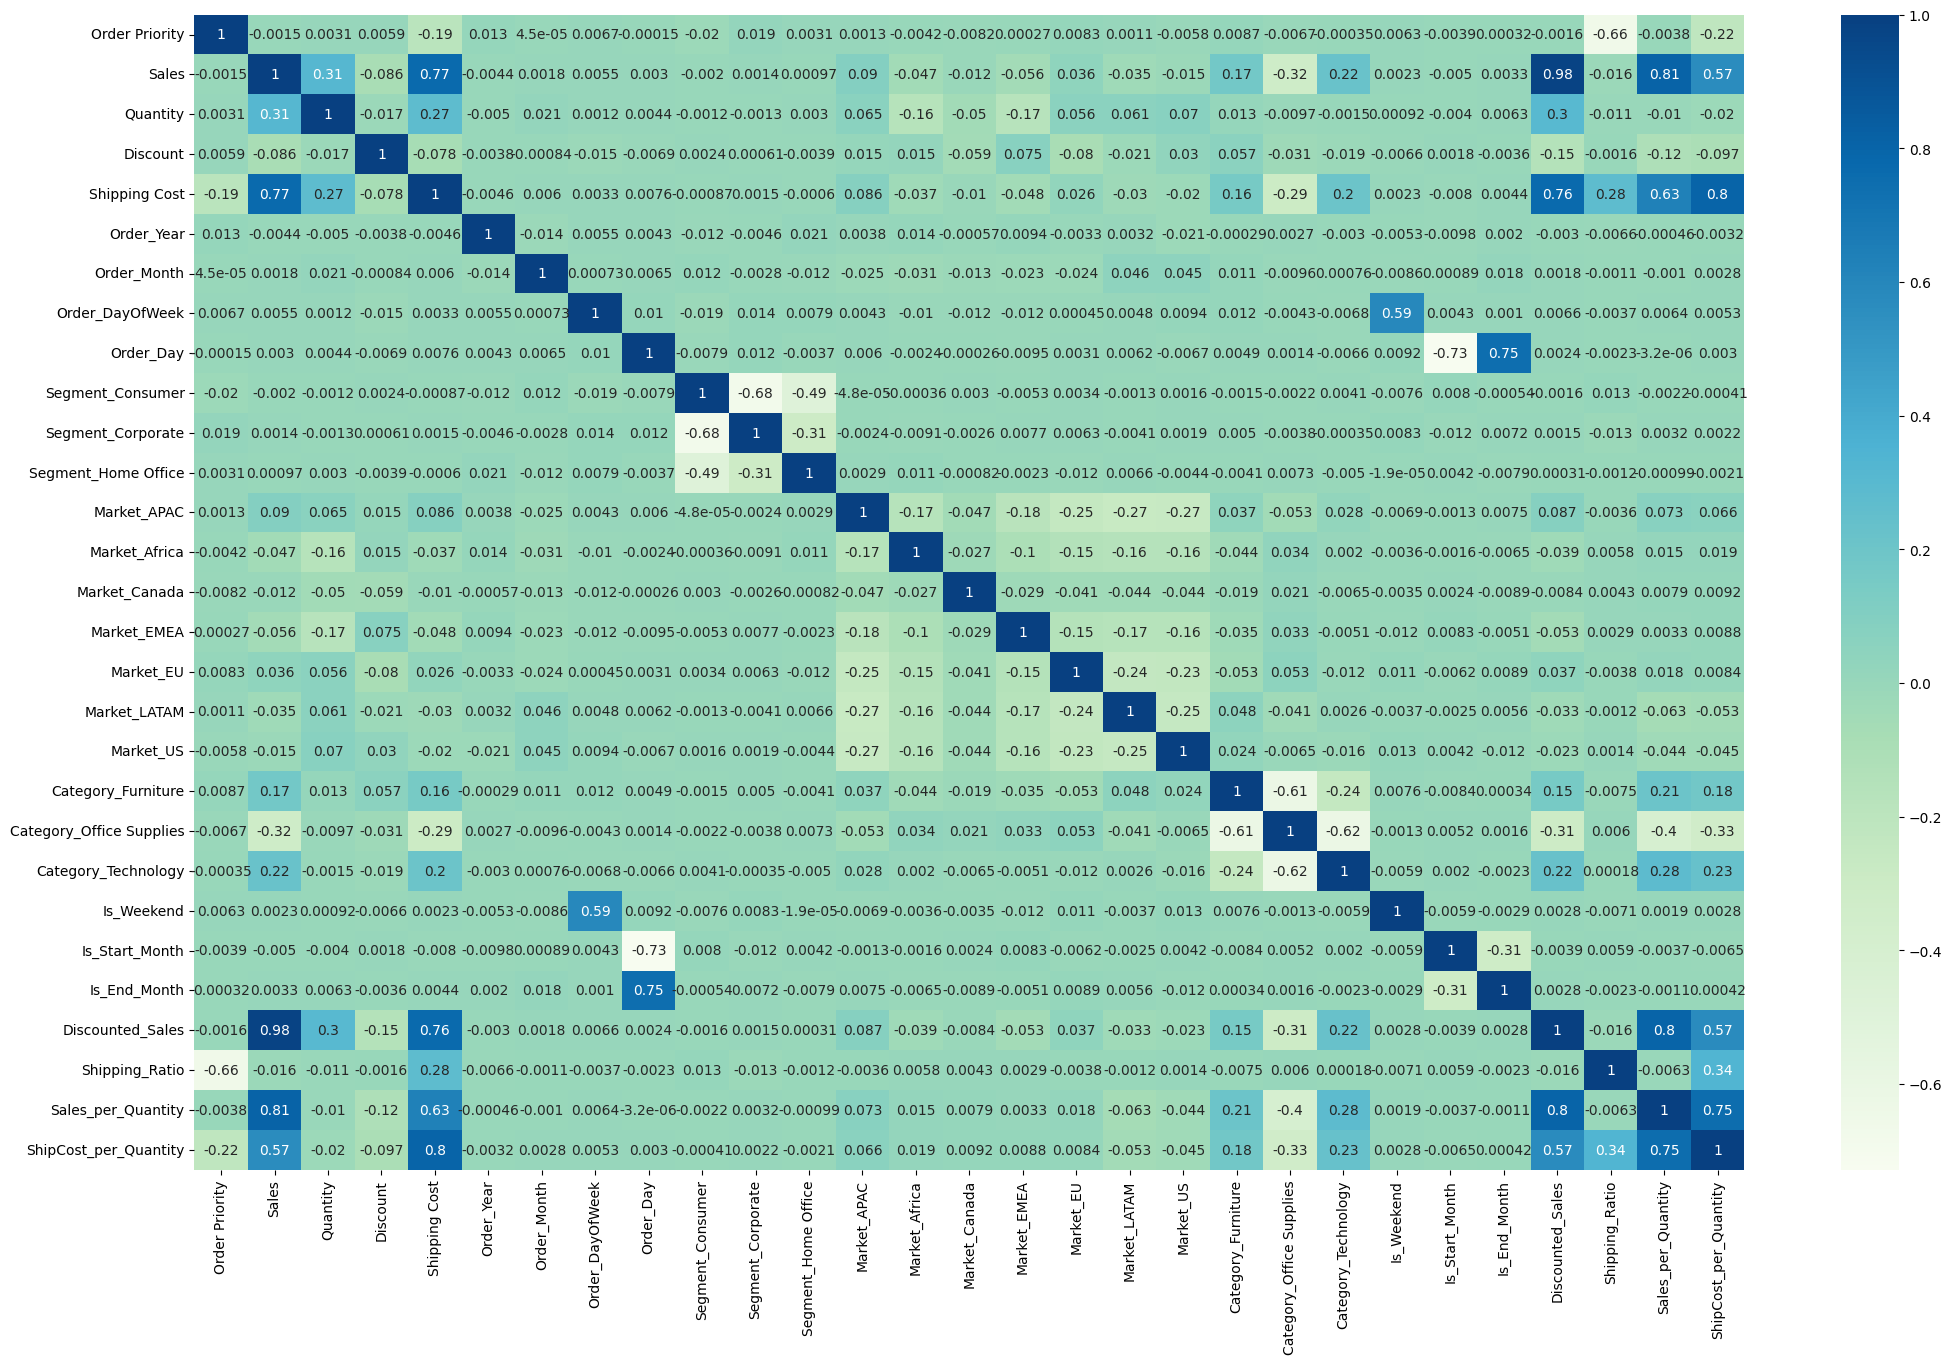

In [173]:
correlation = X.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='GnBu')

In [284]:
X_new,X_test,y_new,y_test = train_test_split(X_train_res,y_train_res,test_size=0.1,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [175]:
print('Training set shape:', X_train.shape, y_train.shape)
print('Validation set shape:', X_valid.shape, y_valid.shape)
print('Test set shape:', X_test.shape, y_test.shape)

Training set shape: (85817, 29) (85817, 1)
Validation set shape: (21455, 29) (21455, 1)
Test set shape: (11920, 29) (11920, 1)


In [176]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)
X_test  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns)

In [ ]:
def model_results(XTrain,XValid,yTrain,yValid):

    models = [
        ('LogReg', LogisticRegression(max_iter=10000)),
        ('KNN', KNeighborsClassifier()),
        ('DecisionTree', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', xgb.XGBClassifier()),
        ('GradientBoost', GradientBoostingClassifier()),
        ('MLP', MLPClassifier()),
        ('SVC', SVC())
    ]
    
    finalResults = []

    for name,model in models:
        model.fit(XTrain, yTrain)
        y_pred = model.predict(XValid)
        
        acc = accuracy_score(yValid, y_pred)
        f1 = f1_score(yValid, y_pred, average='macro')
        prec = precision_score(yValid, y_pred, average='macro', zero_division=0)
        rec = recall_score(yValid, y_pred, average='macro')
        finalResults.append((name, acc, f1, prec, rec))
        
    return finalResults

In [178]:
np.random.seed(42)
results = model_results(X_train, X_valid, y_train, y_valid)
df_results = pd.DataFrame(results, columns=['Model Name', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
df_results

c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: Data

,Model Name,Accuracy,F1 Score,Precision,Recall
0,LogReg,0.441995,0.426479,0.429304,0.441843
1,KNN,0.705197,0.700485,0.703547,0.705584
2,DecisionTree,0.616173,0.616123,0.616454,0.616345
3,RandomForest,0.790632,0.787323,0.792058,0.790938
4,AdaBoost,0.421021,0.409309,0.424879,0.420505
5,XGBoost,0.698252,0.688521,0.694237,0.698370
6,GradientBoost,0.564484,0.545024,0.545379,0.564243
7,MLP,0.591191,0.577573,0.576786,0.591232
8,SVC,0.611606,0.594293,0.604965,0.611647


In [ ]:
def model_test_results(XTrain,XTest,yTrain,yTest):

    test_models = [
        ('LogReg', LogisticRegression(max_iter=10000)),
        ('KNN', KNeighborsClassifier()),
        ('DecisionTree', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', xgb.XGBClassifier()),
        ('GradientBoost', GradientBoostingClassifier()),
        ('MLP', MLPClassifier()),
        ('SVC', SVC())
    ]
    
    finalResults = []
    all_predictions = []

    for name,model in test_models:
        model.fit(XTrain, yTrain)
        y_pred = model.predict(XTest)

        acc = accuracy_score(yTest, y_pred)
        f1 = f1_score(yTest, y_pred, average='macro')
        prec = precision_score(yTest, y_pred, average='macro', zero_division=0)
        rec = recall_score(yTest, y_pred, average='macro')
        finalResults.append((name, acc, f1, prec, rec))
        all_predictions.append((name, y_pred))

    return finalResults, yTest, all_predictions

In [180]:
np.random.seed(42)
test_results, y_true, y_pred = model_test_results(X_train,X_test,y_train,y_test)
test_results = pd.DataFrame(test_results,columns=['Model Name', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
test_results

c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: Data

,Model Name,Accuracy,F1 Score,Precision,Recall
0,LogReg,0.447064,0.430459,0.434225,0.443289
1,KNN,0.713003,0.708103,0.709946,0.711571
2,DecisionTree,0.628691,0.626632,0.626717,0.627097
3,RandomForest,0.798070,0.793487,0.798860,0.795462
4,AdaBoost,0.423490,0.411838,0.429055,0.420886
5,XGBoost,0.705201,0.693363,0.698675,0.701405
6,GradientBoost,0.572315,0.550685,0.551384,0.567587
7,MLP,0.600587,0.585351,0.584898,0.596401
8,SVC,0.613926,0.593966,0.603745,0.609389


In [ ]:
np.random.seed(42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro')

print(f'RandomForest \nAccuracy: {acc}, \nF1 Score: {f1}, \nPrecision: {prec}, \nRecall: {rec}')

c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest 
Accuracy: 0.7979026845637583, 
F1 Score: 0.793264372158089, 
Precision: 0.7985229307537889, 
Recall: 0.7953078355837113


In [236]:
y_true = y_test
y_pred = y_pred

In [237]:
print(type(y_true))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [238]:
df_true = y_true
df_true = df_true.rename(columns={df_true.columns[0]: 'y_true'})
df_true = df_true.reset_index(drop=True)
df_true

,y_true
0,2
1,2
2,1
3,3
4,1
...,...
11915,0
11916,3
11917,2
11918,2


In [239]:
df_pred = pd.DataFrame(y_pred) 
df_pred = df_pred.rename(columns={df_pred.columns[0]: 'y_pred'})
df_pred = df_pred.reset_index(drop=True)
df_pred

,y_pred
0,2
1,2
2,1
3,3
4,1
...,...
11915,0
11916,3
11917,2
11918,2


In [240]:
df_combined = pd.concat([df_true['y_true'], df_pred['y_pred']], axis=1)
df_combined

,y_true,y_pred
0,2,2
1,2,2
2,1,1
3,3,3
4,1,1
...,...,...
11915,0,0
11916,3,3
11917,2,2
11918,2,2


In [279]:
# cm = confusion_matrix(y_true, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

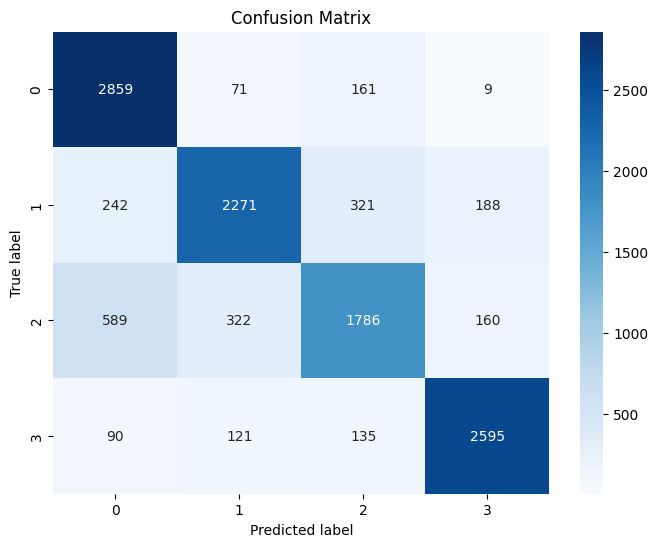

In [278]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [241]:
df_combined.to_excel('ml.xlsx')

In [ ]:
report = classification_report(y_true, y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      3100
           1       0.82      0.75      0.78      3022
           2       0.74      0.63      0.68      2857
           3       0.88      0.88      0.88      2941

    accuracy                           0.80     11920
   macro avg       0.80      0.80      0.79     11920
weighted avg       0.80      0.80      0.79     11920



# Part 2

In [248]:
scaler_std = StandardScaler()

X_train_std = X_train.copy()
X_valid_std = X_valid.copy()
X_test_std = X_test.copy()

X_train_std = pd.DataFrame(scaler_std.fit_transform(X_train_std), columns=X_train_std.columns)
X_valid_std = pd.DataFrame(scaler_std.transform(X_valid_std), columns=X_valid_std.columns)
X_test_std = pd.DataFrame(scaler_std.transform(X_test_std),  columns=X_test_std.columns)

In [ ]:
# scaler_minmax = MinMaxScaler()

# X_train_minmax = X_train.copy()
# X_valid_minmax = X_valid.copy()
# X_test_minmax = X_test.copy()

# X_train_minmax = pd.DataFrame(scaler_minmax.fit_transform(X_train_minmax), columns=X_train_minmax.columns)
# X_valid_minmax = pd.DataFrame(scaler_minmax.transform(X_valid_minmax), columns=X_valid_minmax.columns)
# X_test_minmax = pd.DataFrame(scaler_minmax.transform(X_test_minmax),  columns=X_test_minmax.columns)

In [ ]:
# scaler_robust = RobustScaler()

# X_train_robust = X_train.copy()
# X_valid_robust = X_valid.copy()
# X_test_robust = X_test.copy()

# X_train_robust = pd.DataFrame(scaler_robust.fit_transform(X_train_robust), columns=X_train_robust.columns)
# X_valid_robust = pd.DataFrame(scaler_robust.transform(X_valid_robust), columns=X_valid_robust.columns)
# X_test_robust = pd.DataFrame(scaler_robust.transform(X_test_robust),  columns=X_test_robust.columns)

In [ ]:
# scaler_max_abs = MaxAbsScaler()

# X_train_max_abs = X_train.copy()
# X_valid_max_abs = X_valid.copy()
# X_test_max_abs = X_test.copy()

# X_train_max_abs = pd.DataFrame(scaler_max_abs.fit_transform(X_train_max_abs), columns=X_train_max_abs.columns)
# X_valid_max_abs = pd.DataFrame(scaler_max_abs.transform(X_valid_max_abs), columns=X_valid_max_abs.columns)
# X_test_max_abs = pd.DataFrame(scaler_max_abs.transform(X_test_max_abs),  columns=X_test_max_abs.columns)

In [250]:
np.random.seed(42)
model_std = RandomForestClassifier()
model_std.fit(X_train_std, y_train)

c:\Users\sanas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [251]:
params = model_std.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [252]:
print(X_train_std.shape)
print(y_train.shape)

(85817, 29)
(85817, 1)


In [ ]:
model_std = RandomForestClassifier()
model_std.fit(X_train_std, y_train)

params = {
    'n_estimators': [300, 500, 800, 1000],
    # 'max_depth': [10, 15, 20, 30, None],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2'],
    # 'criterion': ['gini', 'entropy'],
    # 'bootstrap': [True, False]
    # 'ccp_alpha': 0.0,
    # 'class_weight': None,
    # 'max_leaf_nodes': None,
    # 'max_samples': None,
    # 'min_impurity_decrease': 0.0,
    # 'min_weight_fraction_leaf': 0.0,
    # 'monotonic_cst': None,
    # 'n_jobs': -1,
    # 'oob_score': False,
    # 'random_state': 1,
    # 'verbose': 0,
    # 'warm_start': False
}

grid_cv = GridSearchCV(
    param_grid=params,
    estimator=model_std,
    scoring='accuracy',
    cv=5,
    verbose=1, 
    error_score=-1
)

grid_cv.fit(X_train_std, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'n_estimators': 800}

{'max_depth': None}

0.7242970450449379

{'min_samples_split': 2}

0.725905125642677

In [ ]:
# y_pred_train = model_std.predict(X_train_std)
# y_pred_valid = model_std.predict(X_valid_std)
# y_pred_test = model_std.predict(X_test_std)

In [43]:
# acc_train = accuracy_score(y_train, y_pred_train)
# f1_train = f1_score(y_train, y_pred_train, average='macro', zero_division=0)
# prec_train = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
# rec_train = recall_score(y_train, y_pred_train, average='macro', zero_division=0)

# print(f'Train_Accuracy: {acc_train:.4f}')
# print(f'Train_F1-macro: {f1_train:.4f}')
# print(f'Train_Precision: {prec_train:.4f}')
# print(f'Recall: {rec_train:.4f}')

In [44]:
# acc_valid = accuracy_score(y_valid, y_pred_valid)
# f1_valid = f1_score(y_valid, y_pred_valid, average='macro', zero_division=0)
# prec_valid = precision_score(y_valid, y_pred_valid, average='macro', zero_division=0)
# rec_valid = recall_score(y_valid, y_pred_valid, average='macro', zero_division=0)

# print(f'Valid_Accuracy: {acc_valid:.4f}')
# print(f'Valid_F1-macro: {f1_valid:.4f}')
# print(f'Valid_Precision: {prec_valid:.4f}')
# print(f'Valid_Recall: {rec_valid:.4f}')

In [45]:
# acc_test = accuracy_score(y_test, y_pred_test)
# f1_test = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
# prec_test = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
# rec_test = recall_score(y_test, y_pred_test, average='macro', zero_division=0)

# print(f'Test_Accuracy: {acc_test:.4f}')
# print(f'Test_F1-macro: {f1_test:.4f}')
# print(f'Test_Precision: {prec_test:.4f}')
# print(f'Test_Recall: {rec_test:.4f}')